# Project Checkpoint 2 - Research Question Results

**Contributors:** Micah Yong, Annie Lin, Bongi Fleischer, Daniel Yamada

In [38]:
# Import statements
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# Package settings
pd.options.mode.chained_assignment = None

## Research Question 1: How well do transit ridership and infrastructure spending in the transportation sector predict GDP?

### 2.1: Data Overview

For this research question, we will use the [Monthly Transportation Statistics Dataset](https://data.bts.gov/Research-and-Statistics/Monthly-Transportation-Statistics/crem-w557), provided by the Bureau of Transportation Statistics. 

**How were your data generated? Is it a sample or census?**

According to the site, here is how the data is generated. 

> Monthly Transportation Statistics contains over 50 time series from nearly two dozen data sources... In many cases, data are collected by state and local agencies and processed by another federal agency at regular intervals before the results are assembled into BTS products.

Thus, Monthly Transportation Statistics is a census.


**If your data represents a census:**
- Are there any groups that were systematically excluded from your data?
- To what extent were participants aware of the collection/use of this data?
- What is the granularity of your data? What does each row represent? How will that impact the interpretation of your findings?
- Are any of the following concerns relevant in the context of your data (selection bias, measurement error, convenience sampling)?
- Are there important features/columns that you wish you had, but are unavailable? What are they and what questions would they help you answer?

TODO for final report. 

### 2.2: Research Question

How well do transit ridership and infrastructure spending in the transportation sector predict GDP?
- We can use these results to quantify the effectiveness of public transportation on the US economy. Then, we can make informed decisions regarding how much money to spend on transportation infrastructure every month. Additionally, we can make further hypotheses about which aspects in the transportation sector are ripe for (or in need of) innovation. 

To answer this research question, we will set up a prediction problem both GLMs and non-parametric models. 
- If we find that both models are highly accurate predictors of GDP, then we can reasonably infer that transit ridership and/or transportation infrastructure spending are strong predictors of GDP. 
- If we find that either or both models are inaccurate predictors, then we can reasonably infer that transit ridership and/or transportation infrastructure spending are incomplete predictors of GDP. 

### 2.3: EDA

In this part, we will clean the monthly transportation statistics dataset and make initial observations about the data. 

First, let's narrow down the columns we're interested in using as predictors. 

In [39]:
# Load in original dataframe 
data = pd.read_csv("Monthly_Transportation_Statistics.csv")

# We want to keep track of time 
metadata_columns = ["Date", "Index"]

# We want to compute GDP. We'll keep around employment statistics as sanity checks
output_columns = ["Real Gross Domestic Product - Seasonally Adjusted"]

# extra_output_columns = ["Labor Force Participation Rate - Seasonally Adjusted", 
#                         "Unemployment Rate - Seasonally Adjusted",
#                         "Unemployed - Seasonally Adjusted"]

# We will utilize measures of transportation ridership + transportation spending 
ridership_columns = [
    "Transit Ridership - Other Transit Modes - Adjusted",
    "Transit Ridership - Fixed Route Bus - Adjusted",
    "Transit Ridership - Urban Rail - Adjusted",
    "Passenger Rail Passengers",
    "Passenger Rail Total Train Miles",
    "Passenger Rail Employee Hours Worked",
    "Transportation Services Index - Passenger",
#     "Auto sales"
]

spending_columns = [
    "State and Local Government Construction Spending - Transportation",
    "State and Local Government Construction Spending - Mass Transit",
    "State and Local Government Construction Spending - Total",
    "State and Local Government Construction Spending - Pavement", 
    "State and Local Government Construction Spending - Highway and Street",
    "State and Local Government Construction Spending - Automotive",
    "State and Local Government Construction Spending - Infrastructure",
]

prediction_columns = ridership_columns + spending_columns
all_columns = metadata_columns + output_columns + prediction_columns 
# extra_output_columns
df = data[all_columns]

Next, we'll spend some time feature engineering. 

In [40]:
# Create effective spending columns => average spending per month from the past 4 years
df = df.dropna(subset=spending_columns)
average_spending_columns = []

for spending_feature in spending_columns:
    average_five_year_spending = spending_feature + " (Mean)"
    average_spending_columns.append(average_five_year_spending)
    df[average_five_year_spending] = df[spending_feature].rolling(4 * 12, closed="left").mean()

df = df.dropna(subset=average_spending_columns)
df = df.drop(spending_columns, axis=1)
prediction_columns = ridership_columns + average_spending_columns

In [41]:
# Drop null values
y_val = "Real Gross Domestic Product - Seasonally Adjusted"
all_columns = metadata_columns + output_columns + prediction_columns # + extra_output_columns
df = df.dropna(subset=all_columns)

In [42]:
# Computing an estimate of correlation coefficient
def correlation_coefficient_estimate(x, y):
    """Returns the Pearson Correlation Coefficient Estimate amongst non-nan entries across x and y."""
    f = df[[x, y]]
    f = f.dropna()

    return sp.stats.pearsonr(f[x], f[y])[0]

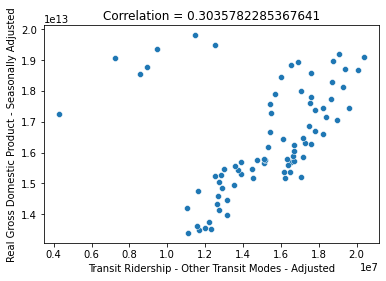

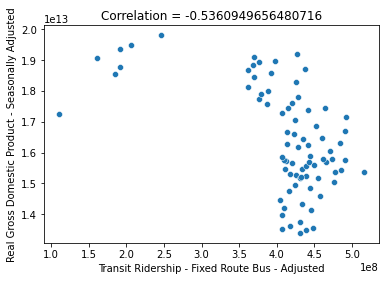

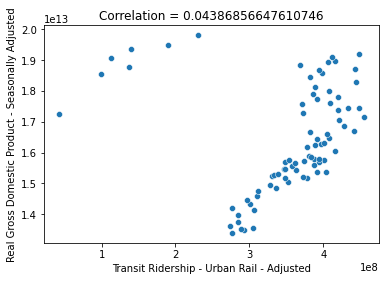

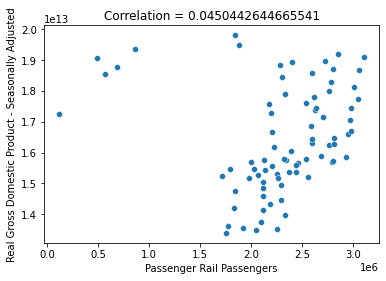

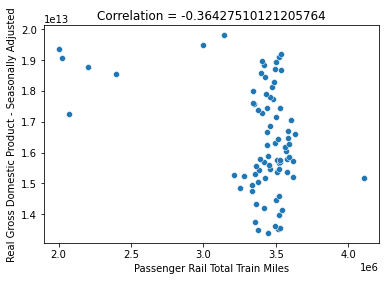

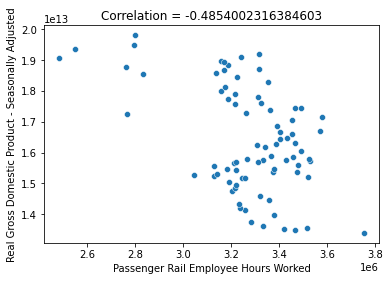

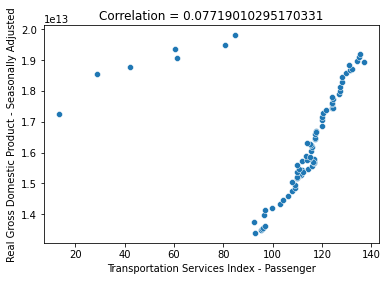

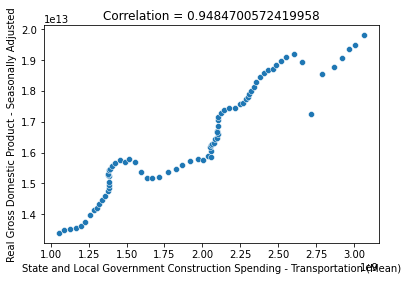

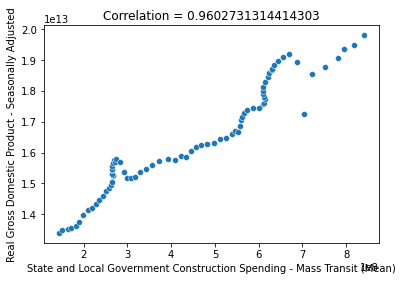

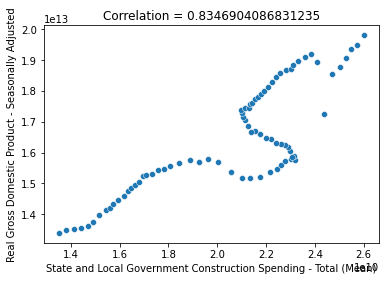

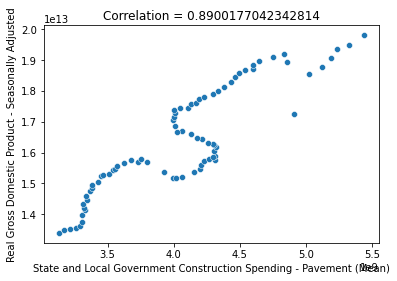

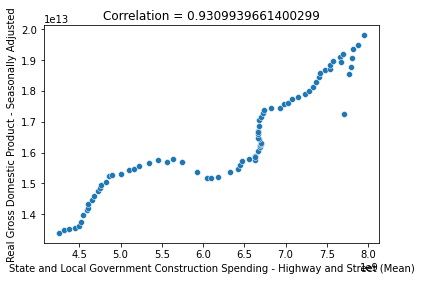

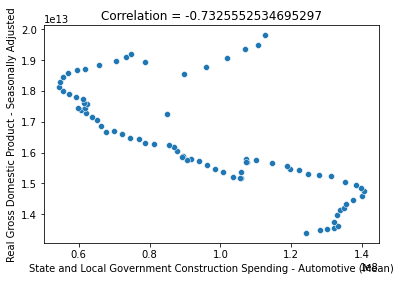

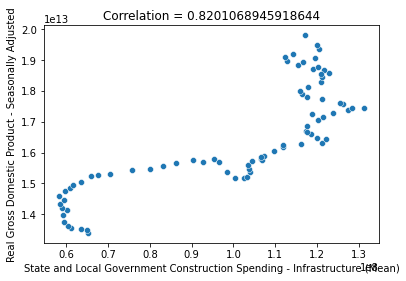

In [43]:
# Plotting and tracking correlation estimates
correlations = []

for i, feature in enumerate(prediction_columns): 
    plt.figure(i)
    r = correlation_coefficient_estimate(feature, y_val)
    correlations.append((r, feature))
    sns.scatterplot(x=df[feature], y=df[y_val]).set(title="Correlation = " + str(r))

In [44]:
# Sort and output correlations from most correlated to least
correlations.sort(reverse=True, key=lambda x: abs(x[0]))
for r, feature in correlations:
    print(feature + " : " + str(r))

State and Local Government Construction Spending - Mass Transit (Mean) : 0.9602731314414303
State and Local Government Construction Spending - Transportation (Mean) : 0.9484700572419958
State and Local Government Construction Spending - Highway and Street (Mean) : 0.9309939661400299
State and Local Government Construction Spending - Pavement (Mean) : 0.8900177042342814
State and Local Government Construction Spending - Total (Mean) : 0.8346904086831235
State and Local Government Construction Spending - Infrastructure (Mean) : 0.8201068945918644
State and Local Government Construction Spending - Automotive (Mean) : -0.7325552534695297
Transit Ridership - Fixed Route Bus - Adjusted : -0.5360949656480716
Passenger Rail Employee Hours Worked : -0.4854002316384603
Passenger Rail Total Train Miles : -0.36427510121205764
Transit Ridership - Other Transit Modes - Adjusted : 0.3035782285367641
Transportation Services Index - Passenger : 0.07719010295170331
Passenger Rail Passengers : 0.04504426

**Describe any trends you observe, and any relationships you may want to follow up on.**

First, we created scatterplots that plot "Real Gross Domestic Product - Seasonally Adjusted" (GDP, adjusted for inflation) against different features related to transit ridership and spending in the transportation sector. Second, we computed an estimate of the correlation coefficients between these features and GDP. These features were broken down into their respective categories.

In [45]:
print("Ridership categories: ", ridership_columns, "\n")

print("Transportation spending categories: ", spending_columns)

Ridership categories:  ['Transit Ridership - Other Transit Modes - Adjusted', 'Transit Ridership - Fixed Route Bus - Adjusted', 'Transit Ridership - Urban Rail - Adjusted', 'Passenger Rail Passengers', 'Passenger Rail Total Train Miles', 'Passenger Rail Employee Hours Worked', 'Transportation Services Index - Passenger'] 

Transportation spending categories:  ['State and Local Government Construction Spending - Transportation', 'State and Local Government Construction Spending - Mass Transit', 'State and Local Government Construction Spending - Total', 'State and Local Government Construction Spending - Pavement', 'State and Local Government Construction Spending - Highway and Street', 'State and Local Government Construction Spending - Automotive', 'State and Local Government Construction Spending - Infrastructure']


Based on the scatterplots, we noticed that many variables in the Spending category have a positive correlation with GDP. We're able to see that each plot displays points that are in a somewhat linear, upward trend. 

On the contrary, we noticed that many variables in the Spending category have a weak, negative correlation with GDP. For example, based on our correlation coefficients, we see that increased ridership in fixed bus routes negatively correlates with GDP in the same month ($r = -0.6104$). Of course, it's unreasonable to conclude that there are any negative causal relationships between bus ridership and GDP, but the results were nonetheless surprising. We previously hypothesized that increased ridership in public transit systems implied increased employment rates (as shown in Checkpoint 1), which would imply increased GDP. Through the EDA phase, we've learned that the relationship between transit ridership, employment rate, and GDP, is much more nuanced and requires deeper investigation. 

For variables with low absolute correlation (e.g., Passenger Rail Passengers), the points seem to be scattered randomly and show no clear relationships and patterns. It appears that variables related to **public transportation** (e.g., spending on mass transit, ridership on fixed bus routes) have higher absolute correlations compared to other transit modes. 

Moving forward, we would like to focus on the relationship between the GDP and features related to public transportation. 

**Describe any data cleaning steps you took. How will these decisions impact your models and
inferences?**

For our research question, we narrowed down the dataset to only contain the variables we feel are necessary to answer the question. The main feature we want to predict is: 
- Real Gross Domestic Product (Seasonally Adjusted)

A secondary feature we may want to investigate later (as a stretch goal) is:
 - Employment Rate 
 > This is calculated by taking the difference of "Labor Force Participation Rate - Seasonally Adjusted" and "Unemployment Rate - Seasonally Adjusted" in the given dataset.


- Spending Average

According to this [case study by JPMorgan](https://www.jpmorgan.com/commercial-banking/insights/the-economic-case-for-infrastructure-spending), infrastructure spending in the transportation sector can take 3-5 years to yield economic results (e.g., due to construction time). Thus, for every trasportation spending feature, we computed the rolling average for transportation spending for the previous 4 years. Thus, our models will primarily capture transportation infrastructure efforts that take less than 4 years to finish. 

- Ridership 

Since data collection on public ridership didn't begin until January 2002, we will begin our analysis there. Thus, our models will primarily be applicable to GDP estimation in post-2000's. 

- Correlation Coefficient

To compute our correlation coefficient estimates, we examined linear relationships between "Employment Rate" and our selected features. We omitted rows where either "Employment Rate" or the selected feature contained a "NaN" value. This crude approach is formally known as "complete case analysis". This approach contains bias if the Census Bureau chose to omit certain variables non-randomly. Thus, we will primarily use this correlation coefficient as an estimate during EDA, but would look for more advanced approaches such as "multiple imputation" in a more rigorous causal study. 


**Explain how your visualizations should be relevant to your research questions: either by motivating the question, or suggesting a potential answer. You must explain why they are relevant.**

Based on our visualizations and estimates for correlation coefficients, we think that public transportation ridership and infrastructure spending in the public transportation sector may be moderate predictors of employment rate. 

**TODO**: Update this

**Ridership**: Assuming that employed workers utilize public transit to some degree, then an increase in public transportation ridership should be positively correlated with an increase in employed workers. Therefore, our EDA suggests a potential answer to our original research question. 

**Average 4-Year Spending**: So far, it appears that spending in the transportation sector negatively correlates with employment rate. However, we recognize that the effects of State and Local Government Construction Spending for the given date does not immediately apply to the date. For example, if the government spends a million dollars to revamp BART trains in January 2012, the positive effects of the revamp may take place many months or years later. Thus, for further analysis, we may want to create a variable that tracks spending from $x$ years ago, where $x$ is the average amount of time it takes for revamp efforts in the public transportation sector to positively affect transit systems (or the average amount of time it takes for construction projects in the transportation sector to finish). 

Once we finalize our features, we can build two models. The first, baseline model can use all columns in the Monthly Transportation Dataset to predict Employment Rate. The second, target model can use the features related to public transit ridership and revamp spending to predict Employment Rate. Then, we can compare models and compose an answer to our original research questions. 

## 2.6: Prediction with GLMs and nonparametric models

### Methods

**Describe what you’re trying to predict, and what features you’re using. Justify your choices.**

For our research question, the main feature we want to predict is: 
- Real Gross Domestic Product (Seasonally Adjusted)

Based on our visualizations and estimates for correlation coefficients during the EDA phase, we think that public transportation ridership and infrastructure spending in the public transportation sector may be moderate predictors of GDP. 

- **Average 4-Year Spending**: Our initial EDA analysis clearly showed that spending in the public transportation sector is highly correlated with GDP. This finding makes sense, since infrastructure provides 1) immediate jobs during the transportation projects and 2) improves public methods for employed workers commuting to work (e.g., increased speed, nicer facilities, etc.). 

- **Ridership**: Assuming that employed workers utilize public transit to some degree, then an increase in public transportation ridership should be positively correlated with an increase in employed workers. Even though the initial correlation coefficients we found for ridership were not as strong as infrastructure spending, there may be more complex, non-linear relationships between ridership and GDP that our initial EDA couldn't capture. 

**Describe the GLM you’ll be using, justifying your choice. Describe any assumptions being made by your modeling choice.**

In the first section, we will build a linear GLM to predict GDP. In particular, we've constructed a GLM with the following properties: 
- Inverse Link Function: Identity
- Link Function: Identity
- Likelihood Function: Gaussian 

TODO: Talk about assumptions made with a linear GLM in the final report. 

**Describe the nonparametric method(s) you’ll be using, justifying your choice. Describe any assumptions being made by your modeling choice.**

In the second section, we will build a neural network to predict GDP. 

TODO: Discuss assumptions 

**How will you evaluate each model’s performance?**

"Real Gross Domestic Product (Seasonally Adjusted)" takes on very large values (i.e., 10-20 trillion dollars), meaning the penalty for squared prediction errors can be massive. 

Furthermore, the error for GDP scales linearly. For example, if the model forecasts that the GDP for Q2 is one billion higher than the GDP in reality, the error penalty should be $1 billion. 

For these reasons, we will be using the **Mean Absolute Error (MAE)** to evaluate both models (rather than RMSE). The MAE is defined as $$\frac{1}{N} \sum_{i = 1}^{N} | y_{i} - \hat{y_{i}} | $$

In [55]:
from sklearn.linear_model import LinearRegression 

In [56]:
# Train, test, validation split into 60% train, 20% test, 20% split
train, validate, test = np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [57]:
# Linear regression
X = train[prediction_columns].to_numpy()
Y = train[y_val].to_numpy()

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

In [61]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, Y_pred))

Mean Absolute Error: 148079048578.94388


**Summarize and interpret the results from your models.**

The value of the root mean squared error for our linear model predicting GDP is 148079048578.94388, which translates to an average difference of around $148 billion between the observed values and predicted values of GDP. Based on the values of GDP within the dataset, we know that the units of measure are usually in the 10-20 trillions range, so seeing such a large number for the MAE of our model is not surprising.

**Estimate any uncertainty in your GLM predictions, providing clear quantitative statements of the uncertainty in plain English.**

In [22]:
# Bootstrap for GLM from Lec 12 Demo
def bootstrap_xy(X, y, fnc, w=None, B=1000, plot=True):
    d = X.shape[1]
    N = X.shape[0]
    w_hat = fnc(X, y)
    w_boot = np.zeros(shape=(B,d))
    for b in range(B):
        bootstrap_indices = rnd.choice(np.arange(N), N)
        bootstrap_X = X.iloc[bootstrap_indices, :]
        bootstrap_y = y.iloc[bootstrap_indices]
        w_boot[b,:] = fnc(bootstrap_X, bootstrap_y)
    if plot:
        plt.scatter(w_boot[:,0], w_boot[:,1], c='b')
        plt.scatter(w_hat[0], w_hat[1], c='r', marker='x', s=300)
        if w:
            plt.scatter(w[0], w[1], c='g', marker='x', s=300)
        plt.show()
    return w_boot

# Linear model from Lec 12 Demo
def lin_model(x, y): 
    model = sm.GLM(
        y, x,
        family=sm.families.Gaussian()
    )
    results = model.fit()
    params = results.params
    
    return params

In [23]:
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF

In [28]:
# GLM Regression Results 
gaussian_model = sm.GLM(
    ok_turbines.log_totals, sm.add_constant(ok_turbines.year),
    family=sm.families.Gaussian()
)
gaussian_results = gaussian_model.fit()
print(gaussian_results.summary())

NameError: name 'ok_turbines' is not defined

**tried to implement something below but not working lol**

In [37]:
import numpy
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [40]:
# Drop null values
y_val = "Real Gross Domestic Product - Seasonally Adjusted"
all_columns = metadata_columns + output_columns + extra_output_columns + prediction_columns 
df = df.dropna(subset=all_columns)
df_no_strings = df.drop(columns = ['Date'])

In [42]:
# dataset
values = df_no_strings.values

# configure bootstrap
n_iterations = 1000
n_size = int(len(df) * 0.50)

# run bootstrap
stats = list()
for i in range(n_iterations):

    # prepare train and test sets
    train = resample(values, n_samples=n_size)
    test = numpy.array([x for x in values if x.tolist() not in train.tolist()])

    # fit model
    model = DecisionTreeClassifier()
    model.fit(train[:,:-1], train[:,-1])

    # evaluate model
    predictions = model.predict(test[:,:-1])
    score = accuracy_score(test[:,-1], predictions)
    print(score)
    stats.append(score)

# plot scores
# pyplot.hist(stats)
# pyplot.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

ValueError: Unknown label type: 'continuous'

### Part 3: Building a neural network to predict GDP 

In [12]:
# definitely did this wrong so far lol 

In [13]:
from sklearn.neural_network import MLPRegressor

nn_regressor = MLPRegressor(random_state=1, max_iter=2000).fit(X, Y)
Y_pred = nn_regressor.predict(X)  # make predictions

/Users/micahyong/.local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
rmse_2 = np.sqrt(np.sum(np.power((Y - Y_pred), 2))) 
rmse_2

27740207125860.953

In [15]:
rmse_2 - rmse_1

26902902566850.496

In [5]:
# i don't think we can use bootstrap for NN, it's not good for non-parametric models